In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection and Processing

In [56]:
# Reading the csv file of gold
df = pd.read_csv('gld_price_data.csv')

In [57]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [58]:
#checcking the rows and columns
df.shape

(2290, 6)

In [59]:
#Some basics information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [60]:
#Checking Null values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [61]:
#checking statistical measures of data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [62]:
#Checking Correlation
corr = df.corr()

C:\Users\hassa\AppData\Local\Temp\ipykernel_8228\1880263677.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

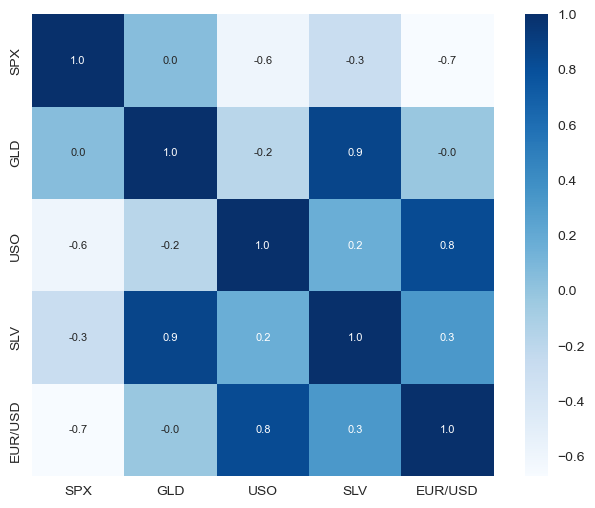

In [63]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, cbar=True, square =True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [64]:
#Checking the Correlation of Gold
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

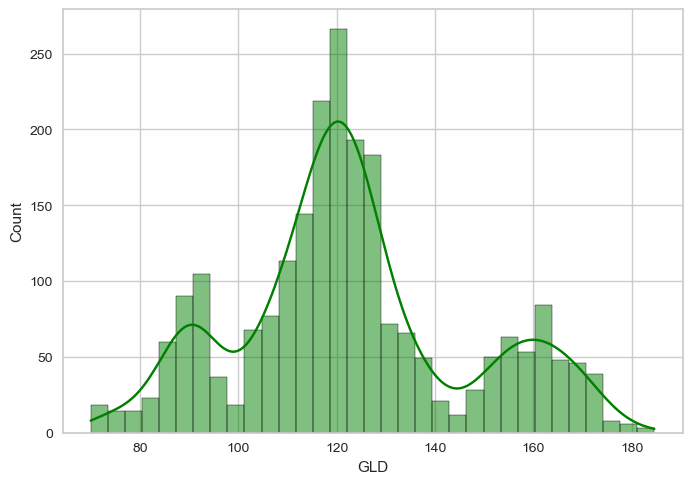

In [65]:
sns.histplot(df['GLD'], color='green', kde=True)

# Splitting the dataset

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = df.drop(['Date','GLD'], axis=1)
Y = df['GLD']

In [68]:
xtrain,xtest,ytrain,ytest = train_test_split(X, Y, test_size=.20, random_state=25, shuffle=True)

In [69]:
print(xtrain.shape,xtest.shape)
print(ytrain.shape, ytest.shape)

(1832, 4) (458, 4)
(1832,) (458,)


# Min_Max_Scaling

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_ = scaler.transform(X)
X = pd.DataFrame(data=X_, columns = X.columns)
X.head()

,SPX,USO,SLV,EUR/USD
0,0.350870,0.643809,0.164801,0.772924
1,0.350870,0.642896,0.167535,0.777924
2,0.334693,0.633218,0.164462,0.779713
3,0.336765,0.616691,0.161494,0.766862
4,0.324931,0.621804,0.175475,0.925504


# Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr = LinearRegression()

In [73]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [74]:
lr_pred_test = lr.predict(xtest)

In [75]:
lr_pred_train = lr.predict(xtrain)

In [76]:
lr.coef_

array([ 6.88061230e-03, -2.48001463e-01,  3.17240731e+00, -9.91704896e+00])

In [77]:
lr.intercept_

68.32653666118401

**R2 Score**

In [78]:
from sklearn.metrics import r2_score

In [79]:
# R2_score of test
lr_r2_test = r2_score(ytest,lr_pred_test)
lr_r2_test

0.8813059917362553

In [80]:
lr_r2_train = r2_score(ytrain, lr_pred_train)
lr_r2_train

0.8813726825351816

In [81]:
print("R2 Score for Linear Regression Testing Data: ", lr_r2_test)
print("R2 Score for Linear Regression Training Data: ", lr_r2_train)

R2 Score for Linear Regression Testing Data:  0.8813059917362553
R2 Score for Linear Regression Training Data:  0.8813726825351816


In [82]:
r_2=[]
for i in range(1, xtest.shape[-1]+1):
    m=LinearRegression()
    m.fit(xtrain.values[:,:i],ytrain)
    prd=m.predict(xtest.values[:,:i])
    r_2.append(r2_score(ytest,prd))

Text(0, 0.5, 'R_2 Score')

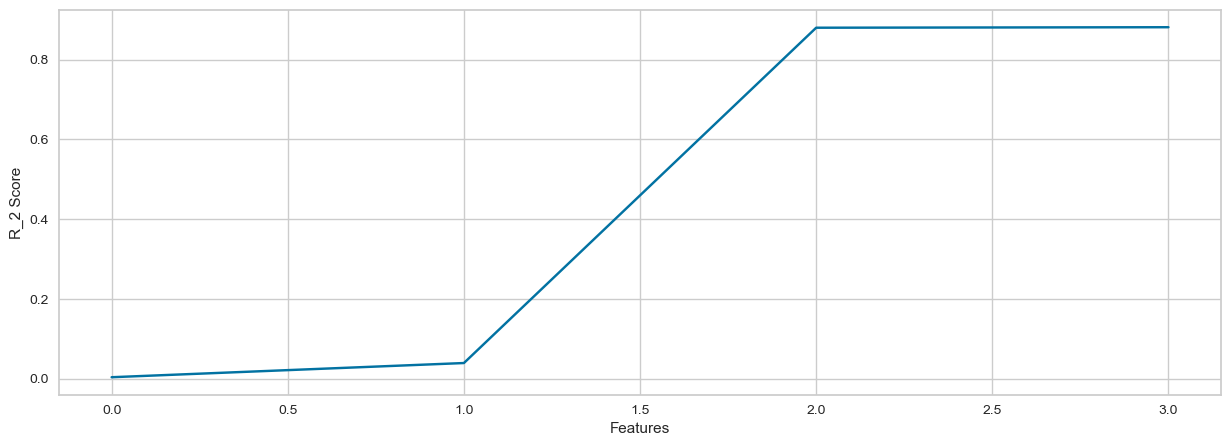

In [83]:
plt.figure(figsize=(15,5))
plt.plot(r_2)
plt.xlabel('Features')
plt.ylabel('R_2 Score')

**Adjusted R2 Calcuation**

In [84]:
import adj_helper as helper
helper.adjR2(xtest,ytest,lr_r2_test)

The adjusted R2 is: 0.8802579210231097


**ResidualsPlot**

In [85]:
from yellowbrick.regressor import ResidualsPlot

D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


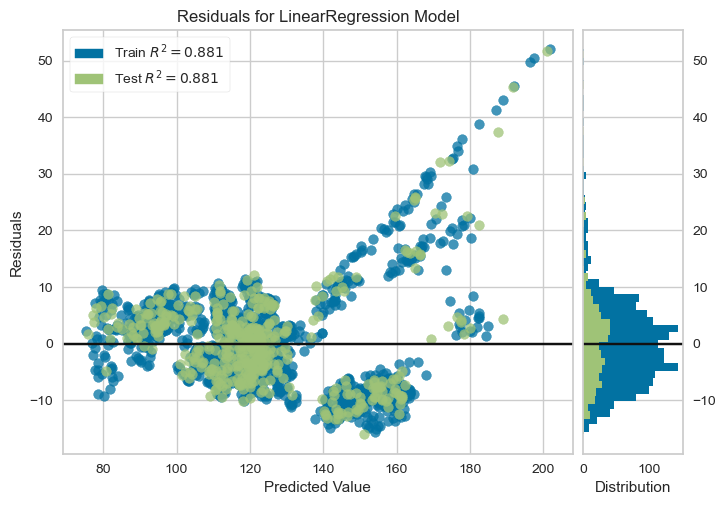

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [86]:
visual = ResidualsPlot(lr)
visual.fit(xtrain.values,ytrain.values)
visual.score(xtest.values, ytest.values)
visual.poof()

# Cross Validation Score of Linear Model

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
scores = cross_val_score(lr, xtrain,ytrain, cv=4)

In [89]:
print(scores)

[0.87459388 0.87314295 0.89438675 0.87485134]


In [90]:
print(scores.mean())

0.8792437327332269


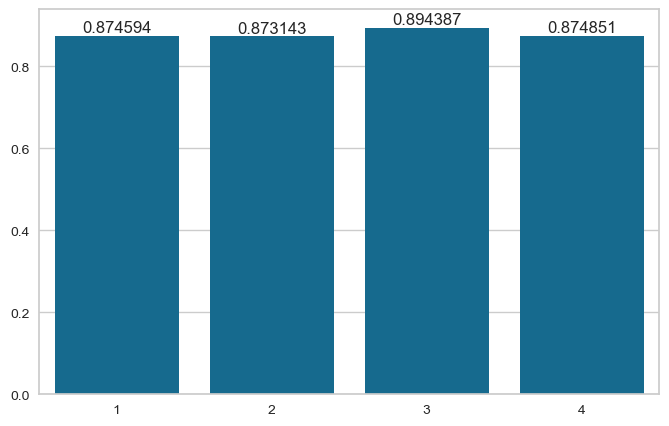

In [91]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x=list(range(1,len(scores)+1)),y=scores, color='b')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Polynomial Regression

In [92]:
from sklearn.preprocessing import PolynomialFeatures

In [93]:
poly_feature = PolynomialFeatures(degree=2)

In [94]:
x_poly_train = poly_feature.fit_transform(xtrain)
x_poly_test = poly_feature.fit_transform(xtest)

In [95]:
poly_model = LinearRegression()

In [96]:
poly_model.fit(x_poly_train,ytrain)

LinearRegression()

In [97]:
poly_test_pred = poly_model.predict(x_poly_test)

In [98]:
poly_train_pred = poly_model.predict(x_poly_train)

**R2 Score**

In [99]:
poly_train_r2 = r2_score(ytrain,poly_train_pred)
poly_test_r2 = r2_score(ytest, poly_test_pred)

In [100]:
print("R2 Score of Training: ", poly_train_r2)
print("R2 Score of Testing: ", poly_test_r2)

R2 Score of Training:  0.9570959737519708
R2 Score of Testing:  0.9649345098293134


In [101]:
r_2=[]
for i in range(1, xtest.shape[-1]+1):
    m=LinearRegression()
    m.fit(xtrain.values[:,:i],ytrain)
    prd=m.predict(xtest.values[:,:i])
    r_2.append(r2_score(ytest,poly_test_pred))

Text(0, 0.5, 'R_2 Score')

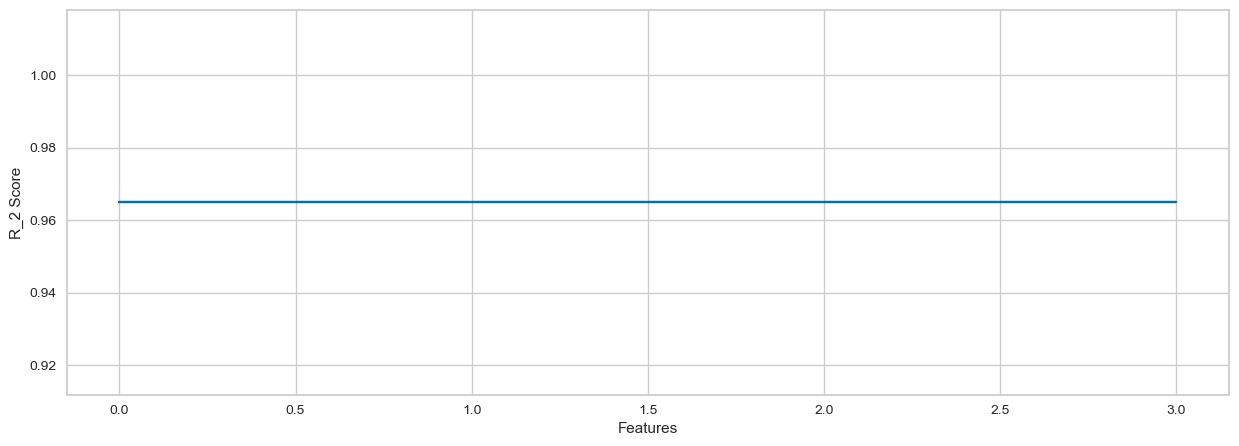

In [102]:
plt.figure(figsize=(15,5))
plt.plot(r_2)
plt.xlabel('Features')
plt.ylabel('R_2 Score')

**Adjusted R2 Calculation**

In [103]:
import adj_helper as helper
helper.adjR2(x_poly_test,ytest,poly_test_r2)

The adjusted R2 is: 0.9637445045067787


**Residuals Plot**

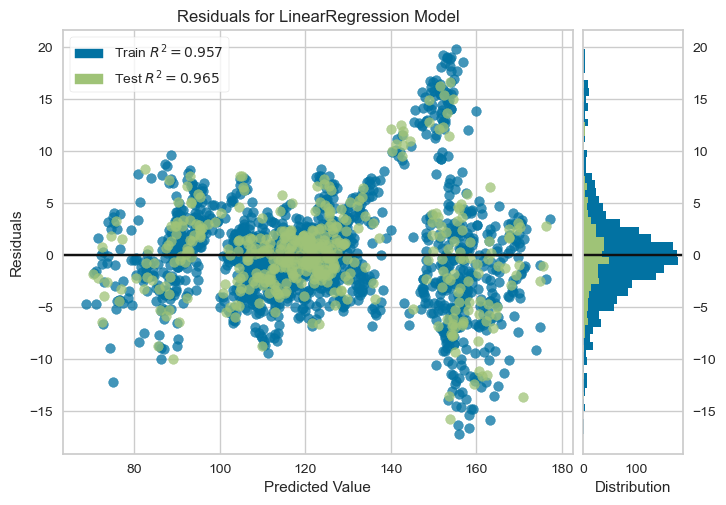

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [104]:
visual = ResidualsPlot(poly_model)
visual.fit(x_poly_train,ytrain)
visual.score(x_poly_test, ytest)
visual.poof()

**Cross Validation of Poly Model**

In [105]:
scores = cross_val_score(poly_model,x_poly_train,ytrain)

In [106]:
print(scores)

[0.94995931 0.95787983 0.95156669 0.96313938 0.95752586]


In [107]:
print(scores.mean())

0.9560142144797827


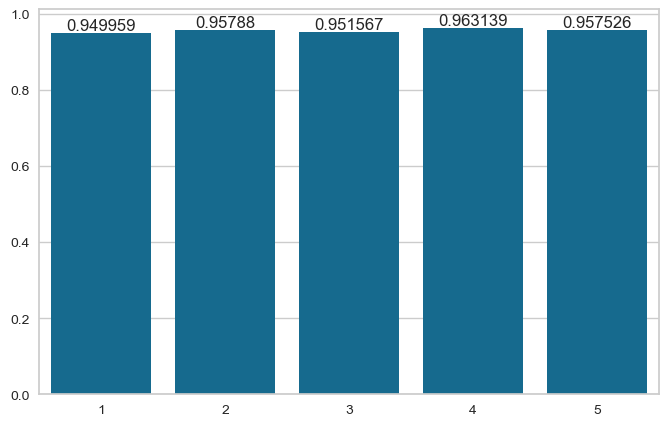

In [108]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x=list(range(1,len(scores)+1)),y=scores, color='b')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# RandomForestRegressor

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
rf = RandomForestRegressor(n_estimators=100)

In [113]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [115]:
rf_test_pred = rf.predict(xtest)

In [116]:
rf_train_pred = rf.predict(xtrain)

**R2 Score**

In [118]:
rf_train_r2 = r2_score(ytrain,rf_train_pred)
rf_test_r2 = r2_score(ytest,rf_test_pred)

In [119]:
print("R2 Score of Training: ", rf_train_r2)
print("R2 Score of Testing: ", rf_test_r2)

R2 Score of Training:  0.9985206002052137
R2 Score of Testing:  0.9926372556167911


**Adjusted R2**

In [120]:
helper.adjR2(xtest,ytest,rf_test_r2)

The adjusted R2 is: 0.9925722424213543


**Residuals Plot**

D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


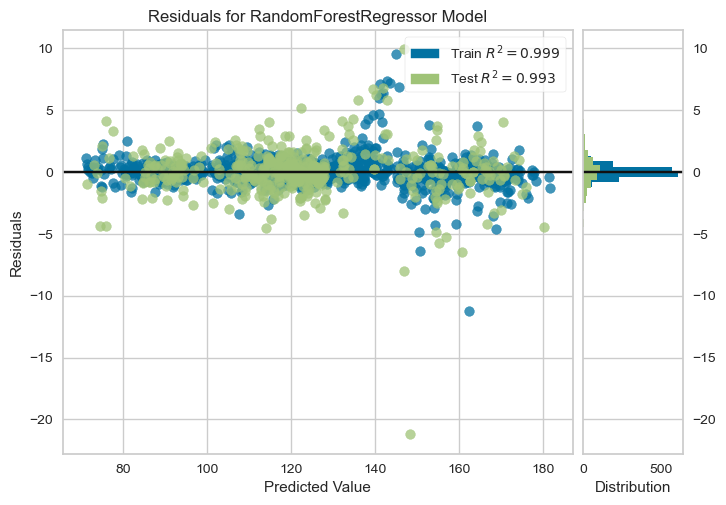

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [122]:
visual = ResidualsPlot(rf)
visual.fit(xtrain,ytrain)
visual.score(xtest, ytest)
visual.poof()

**Cross Validation Score**

In [123]:
scores = cross_val_score(rf, xtrain, ytrain)

In [124]:
print(scores.mean())

0.9879256526548273


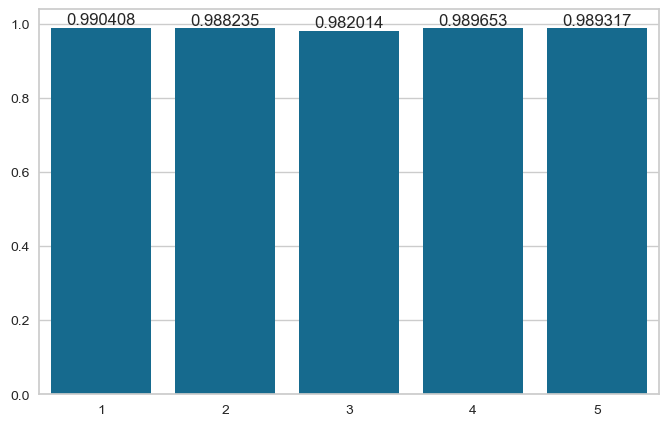

In [125]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x=list(range(1,len(scores)+1)),y=scores, color='b')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

**Comparison of Actual and Predicted Values**

In [136]:
Ytest = list(ytest)

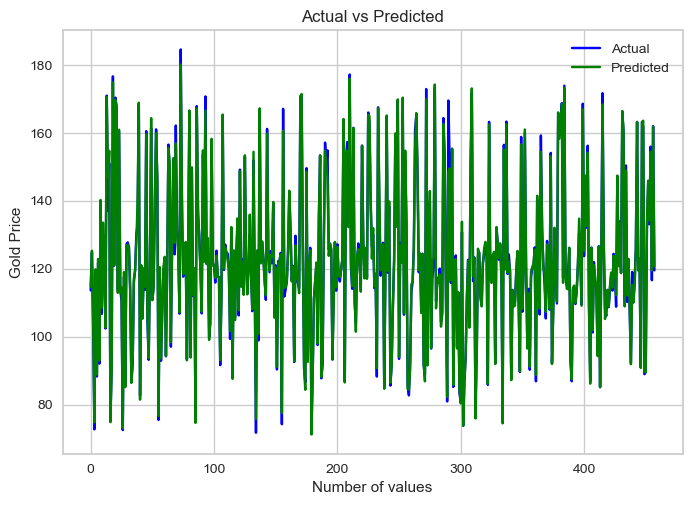

In [137]:
plt.plot(Ytest, color='blue', label='Actual')
plt.plot(rf_test_pred, color='green', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()